# Clustering

**Integrantes:**
- Maria Camila Zapata Arrubla
- Andres Alexis Galvis Herrera
- Juan José Zapata Cadavid

# Primer punto

## Pre-procesamiento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lectura del dataset

In [2]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv").drop("index", axis=1)
# Aleatorizar los datos
data = data.sample(frac=1,random_state=42).reset_index(drop=True)
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
1,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
2,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
3,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
4,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [3]:
data.shape

(5268, 13)

In [4]:
data.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

Cambiaremos los tipos de datos para tener una mejor gestión de estos

In [5]:
# Transformar la columna al formato de fecha de pandas
data["Date"] = pd.to_datetime(data["Date"])

In [6]:
data.dtypes

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

### Creando nuevas columnas

In [7]:
data["Day"] = data["Date"].apply(lambda x: x.day)
data["Month"] = data["Date"].apply(lambda x: x.month)
data["Year"] = data["Date"].apply(lambda x: x.year)

In [8]:
data["Hour"] = data["Time"].str.extract("(\d*):")
data["Minutes"] = data["Time"].str.extract(":(\d*)")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1976\372391649.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["Hour"] = data["Time"].str.extract("(\d*):")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1976\372391649.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["Minutes"] = data["Time"].str.extract(":(\d*)")


In [9]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Month,Year,Hour,Minutes
0,2001-07-30,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...,30,7,2001,16,00
1,2004-11-28,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air...",28,11,2004,09,55
2,1944-06-20,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.,20,6,1944,NaN,NaN
3,1963-10-09,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...,9,10,1963,NaN,NaN
4,1969-06-05,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...,5,6,1969,07,12


### Visualización de datos

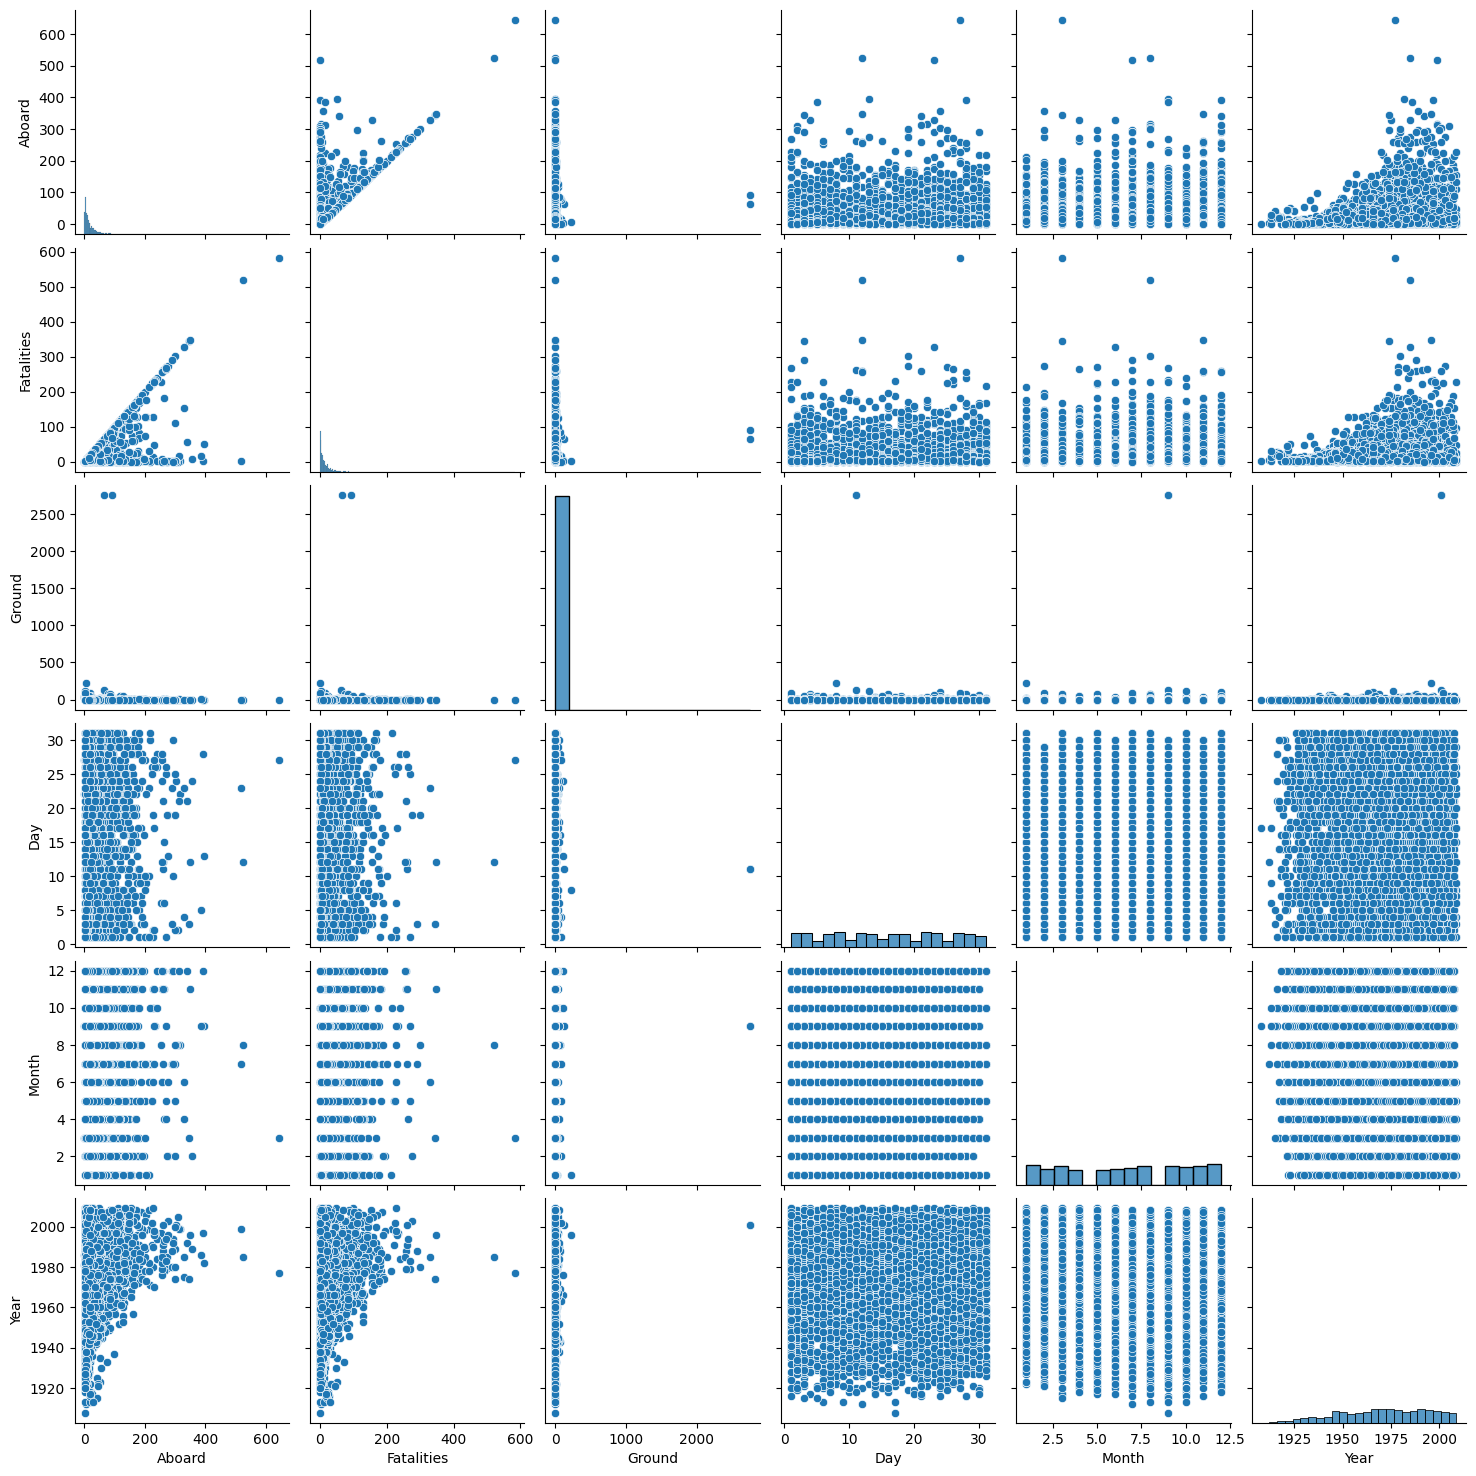

In [10]:
sns.pairplot(data)
plt.show()

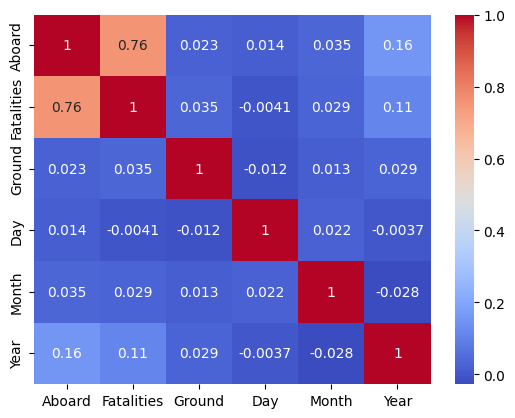

In [11]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Valores nulos

Podemos observar que en la columna Flight hay un valor '-' que podría indicar valores nulos, por lo que debemos cambiarlo.

In [12]:
data["Flight #"].unique()

array([nan, '73', '296Q', '2208', '21', '173', '2207', '9570', '28', '-',
       '760', '7', '542', '191', '6715', '007', '43', '8060', '785',
       '5634', '278', '4184', '296', '702', '114', '2808', '861', '230',
       '123', '1907', '217', '052', '410', '23', '405', '904', '8',
       '1771', '593', '698', '8261', '1-11', '844', '7601', '9755', '712',
       '841', '4', '002', '005', '3303', '869', '204', '801', '763',
       '686 / -', '2415', '602', '371', '357', '6865', '725', '5719',
       '5071', '22', '145', '441', '642', '57', '3210', '6780', '739/14',
       '201/8', '13', '67', '701', '864', '816', '139', '923', '401',
       '1103', '222', '2886', '775', '703', '733', '522', '700', '3054',
       '150', '310', '406', '086', '24', '345', '1016', '612', '1658',
       '507', '301', '438', '485', '1301', '502', '823', '209', '4272',
       '148', '529', '110', '633', '878', '2303', '075', '44-2', '585',
       '956', '17K', '1812', '1493/5569', '358', '870', '845/26', '831

In [13]:
data["Flight #"] = data["Flight #"].replace("-", np.nan)
data["Flight #"].unique()

array([nan, '73', '296Q', '2208', '21', '173', '2207', '9570', '28',
       '760', '7', '542', '191', '6715', '007', '43', '8060', '785',
       '5634', '278', '4184', '296', '702', '114', '2808', '861', '230',
       '123', '1907', '217', '052', '410', '23', '405', '904', '8',
       '1771', '593', '698', '8261', '1-11', '844', '7601', '9755', '712',
       '841', '4', '002', '005', '3303', '869', '204', '801', '763',
       '686 / -', '2415', '602', '371', '357', '6865', '725', '5719',
       '5071', '22', '145', '441', '642', '57', '3210', '6780', '739/14',
       '201/8', '13', '67', '701', '864', '816', '139', '923', '401',
       '1103', '222', '2886', '775', '703', '733', '522', '700', '3054',
       '150', '310', '406', '086', '24', '345', '1016', '612', '1658',
       '507', '301', '438', '485', '1301', '502', '823', '209', '4272',
       '148', '529', '110', '633', '878', '2303', '075', '44-2', '585',
       '956', '17K', '1812', '1493/5569', '358', '870', '845/26', '831',
  

In [14]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4266
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
Day                0
Month              0
Year               0
Hour            2223
Minutes         2223
dtype: int64

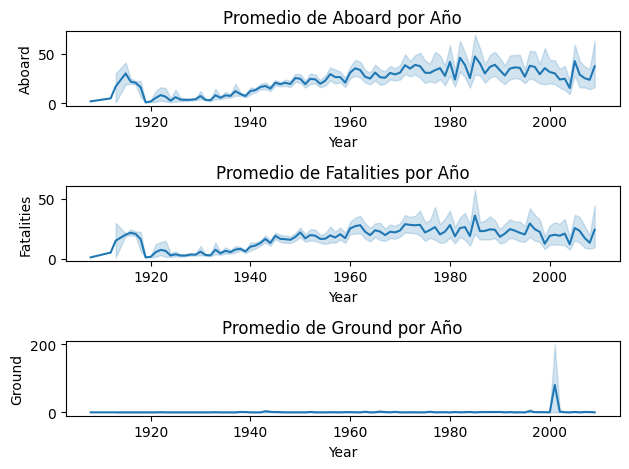

In [15]:
plt.subplot(3, 1, 1)
sns.lineplot(data=data, x='Year', y='Aboard', estimator='mean')
plt.title('Promedio de Aboard por Año')

# Gráfico de líneas para 'Fatalities'
plt.subplot(3, 1, 2)
sns.lineplot(data=data, x='Year', y='Fatalities', estimator='mean')
plt.title('Promedio de Fatalities por Año')

# Gráfico de líneas para 'Ground'
plt.subplot(3, 1, 3)
sns.lineplot(data=data, x='Year', y='Ground', estimator='mean')
plt.title('Promedio de Ground por Año')

plt.tight_layout()
plt.show()

De lo anterior observamos lo siguiente:
- El número promedio de personas a bordo por incidente y el número promedio de fatalidades por incidente se observa un aumento considerable desde el año 1940 hasta el año 2000.
- La mayoría de los años muestran un número muy bajo o cero víctimas en tierra, con un promedio que se mantiene cercano a cero. Sin embargo, hay un pico muy pronunciado alrededor del año 2000, indicando un incidente significativo con un alto número de víctimas en tierra.




In [16]:
data_selected = data[["Aboard", "Fatalities", "Ground"]].copy()

In [17]:
data_selected.isnull().sum()

Aboard        22
Fatalities    12
Ground        22
dtype: int64

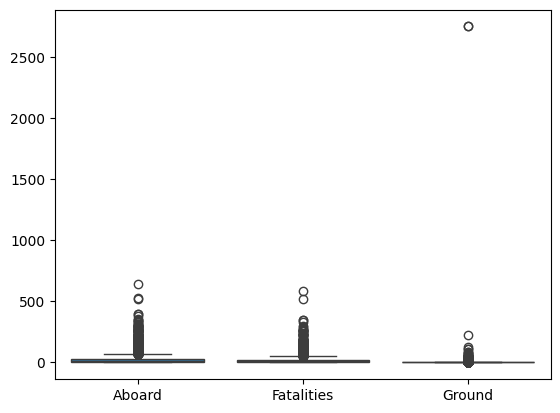

In [18]:
box = sns.boxplot(data_selected)

Del anterior Boxplot podemos concluir lo siguiente:
- **Incidentes Extremos:** Los outliers en todas las variables sugieren que hay varios incidentes extremos en el conjunto de datos.
- **Predominio de Valores Bajos:** La mayoría de los datos parecen estar en un rango bajo, con algunos valores extremos que aumentan considerablemente.

In [19]:
data_selected.dropna(inplace=True)
data_selected.isnull().sum()

Aboard        0
Fatalities    0
Ground        0
dtype: int64

In [20]:
data_selected.describe()

,Aboard,Fatalities,Ground
count,5236.000000,5236.000000,5236.000000
mean,27.589190,20.104851,1.611154
std,43.109636,33.238341,54.039316
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


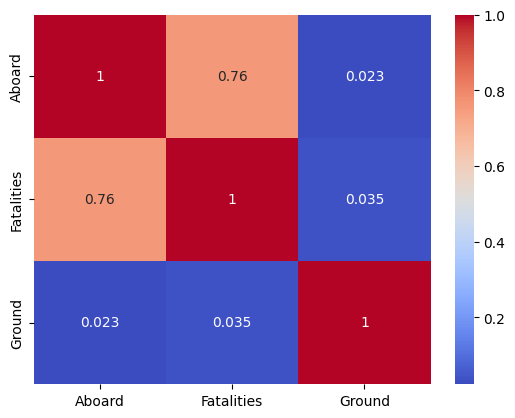

In [21]:
sns.heatmap(data_selected.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Conclusiones del preprocesamiento

El objetivo del trabajo es analizar accidentes aéreos, por lo que al realizar este análisis exploratorio de datos se evidencia con un heatmap una correlación alta entre las variables Aboard y Fatalities, como es positiva es un indicativo que cuando una variable aumenta la otra también tiende a esto.
Luego tenemos variables que hace referencia a las personas que están en el avión y el número de personas que han perdido la vida como resultado de un accidente o incidente aéreo, por lo que parece importante tener en cuenta a las personas que están en el suelo, ya que esto ayuda a tener más factores a analizar en los accidentes aéreos.

## Modelado

# Segundo Punto

In [22]:
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_selected)

### Método del codo

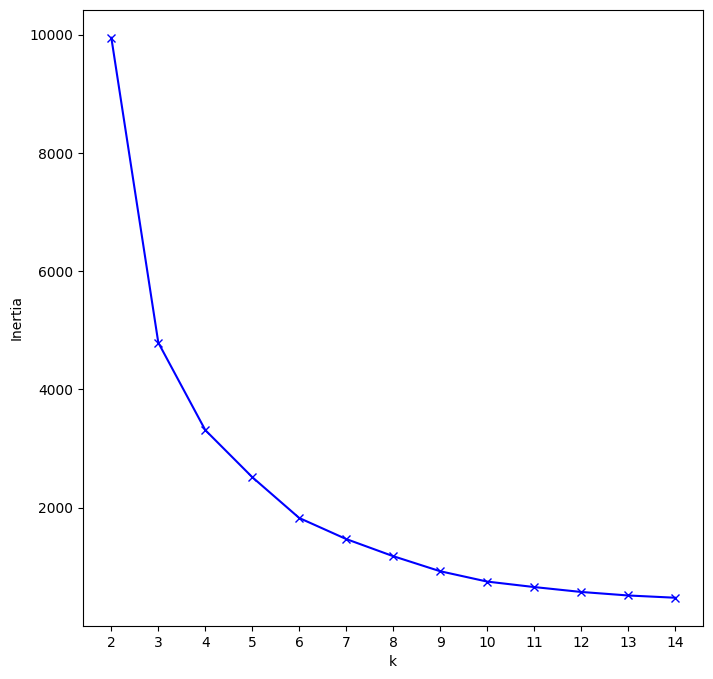

In [24]:
sum_of_squared_distance = []

K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10).fit(data_scaled)
    sum_of_squared_distance.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_squared_distance, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks(K)
plt.show()

### Estadístico de gap

In [25]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        refDisps = np.zeros(nrefs)

        for i in range(nrefs):

            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp

        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        gaps[gap_index] = gap

        resultsdf = pd.concat([resultsdf, pd.DataFrame({'clusterCount': [k], 'gap': [gap]})], ignore_index=True)

    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)

In [26]:
k, gapdf = optimalK(data_scaled, nrefs=5, maxClusters=10)
print('La cantidad óptima de clusters es: ', k)

La cantidad óptima de clusters es:  10


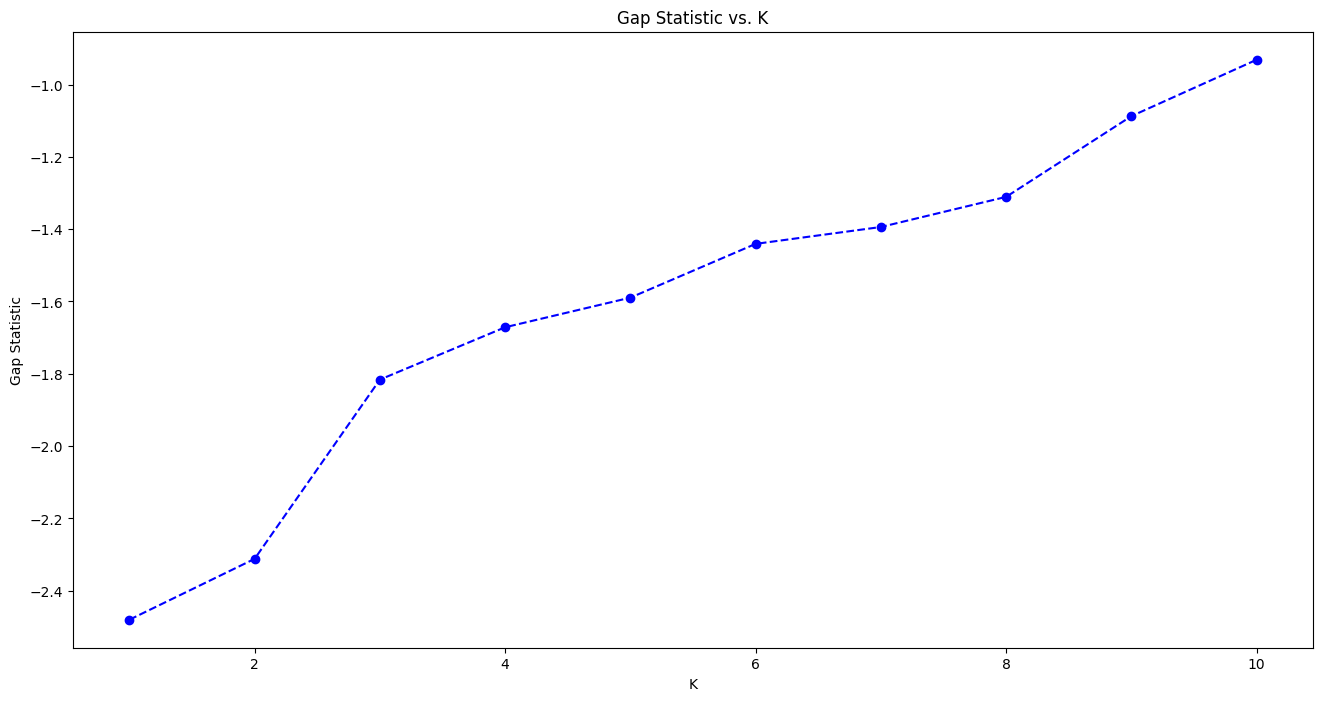

In [27]:
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

### Método de la silueta

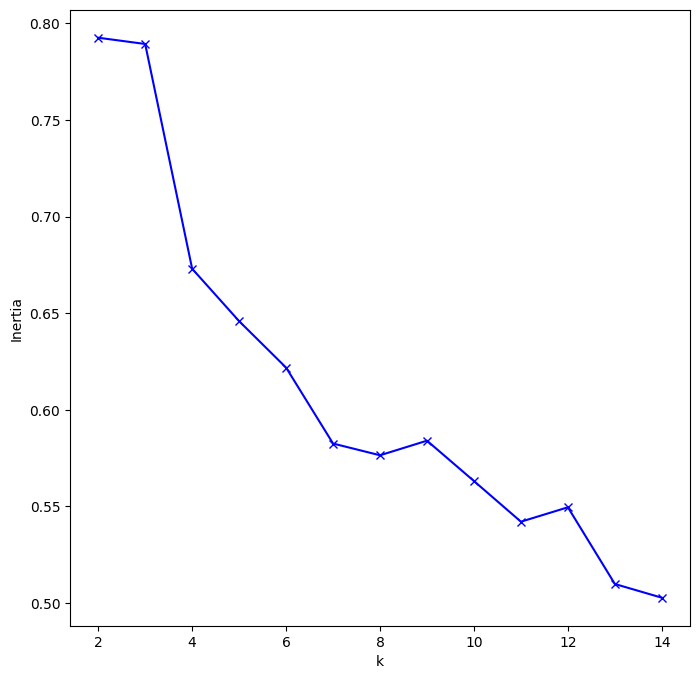

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10).fit(data_scaled)
    y = km.predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, y))

plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

#### Análisis

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, n_init=10))

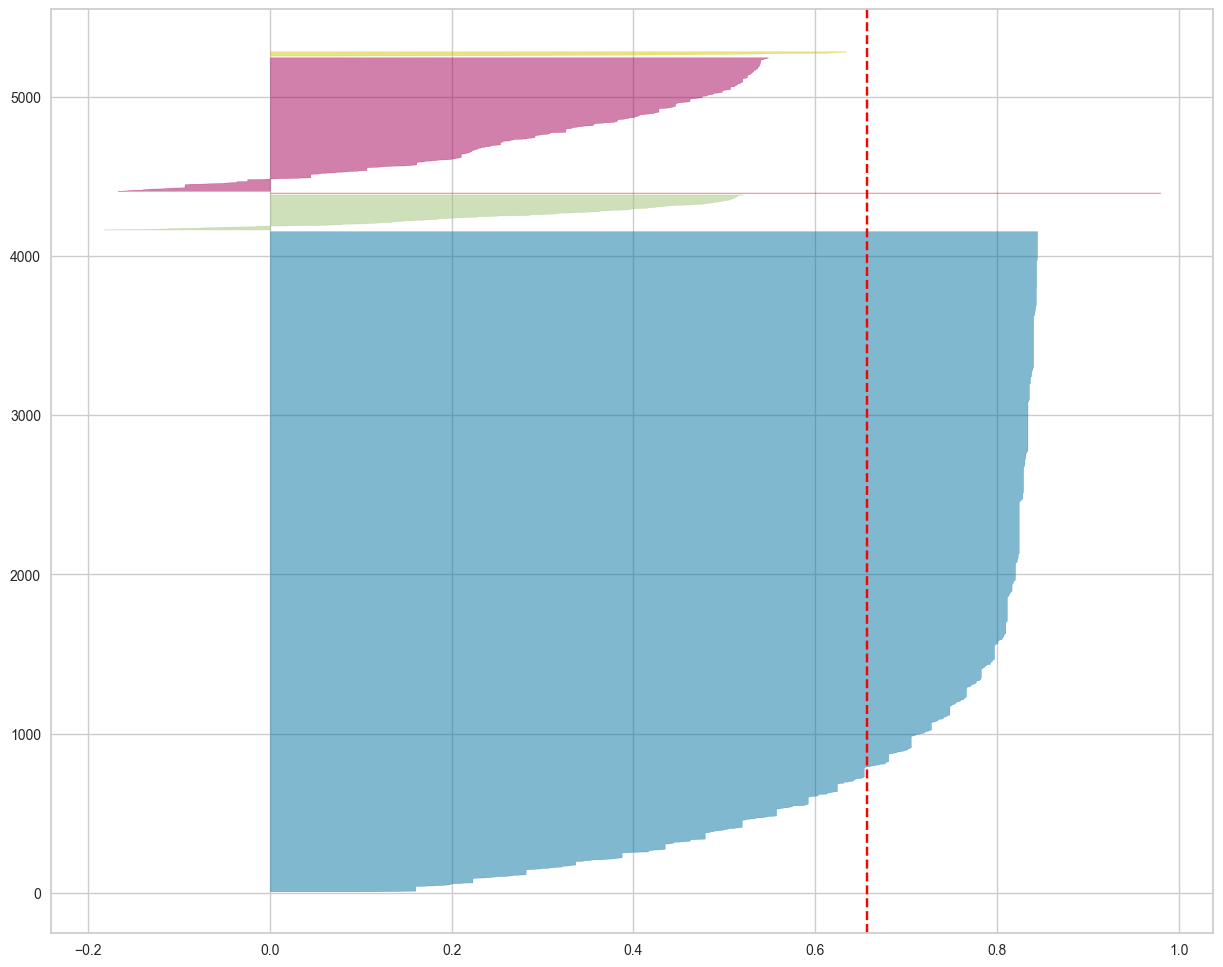

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans(5, n_init=10)
visualizer = SilhouetteVisualizer(km, colors="yellowbrick")
plt.figure(figsize=(15, 12))
visualizer.fit(data_scaled)

### Usando la variable Summary

Decidimos hacer un segundo procesado para otro modelo teniendo en cuenta la columna summary, debido a que en esta nos dan una explicación más detallada de que fue lo que pasó en el accidente.

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv").drop("index", axis=1)
# Aleatorizar los datos
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
1,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
2,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
3,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
4,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [32]:
data.shape

(5268, 13)

In [33]:
# Transformar la columna al formato de fecha de pandas
data["Date"] = pd.to_datetime(data["Date"])

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [35]:
# Codificar la variable categórica de Location usando un LabelEncoder, para poder usarla en el entrenamiento
encoder = LabelEncoder()
location_encoded = encoder.fit_transform(data[['Location']])
location_encoded = location_encoded.reshape(-1, 1)

c:\Users\Usuario\Documents\Universidad\IA\Trabajos\Microproyecto_2\.env\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Vectorizar (llevar a números) la variable Summary (que es texto plano)
vectorizer = TfidfVectorizer()
data['Summary'] = data['Summary'].fillna('') # Importante primero rellenar datos nulos
summary_vectorized = vectorizer.fit_transform(data['Summary'])

In [37]:
# Nos aseguramos que la variable Fatalities contenga solo números y además, imputados con 0
data['Fatalities'] = pd.to_numeric(data['Fatalities'], errors='coerce').fillna(0)

# Escalar la variable Fatalities para ayudar al entrenamiento del modelo
scaler = StandardScaler()
fatalities_scaled = scaler.fit_transform(data[['Fatalities']])

In [38]:
# Convertir summary_vectorized a un array
summary_vectorized_dense = summary_vectorized.toarray()

In [39]:
# Combinar todas las variables
features = np.hstack((location_encoded, summary_vectorized.toarray(), fatalities_scaled))

In [40]:
# Entrenar el modelo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Obtener los clústeres
data['Cluster'] = kmeans.labels_

In [41]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Cluster
0,2001-07-30,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...,1
1,2004-11-28,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air...",1
2,1944-06-20,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.,3
3,1963-10-09,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...,4
4,1969-06-05,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...,0


# Segundo punto

In [42]:
sum_of_squared_distance = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10).fit(features)
    sum_of_squared_distance.append(km.inertia_)
    y = km.predict(features)
    silhouette_scores.append(silhouette_score(features, y))

## Método del codo

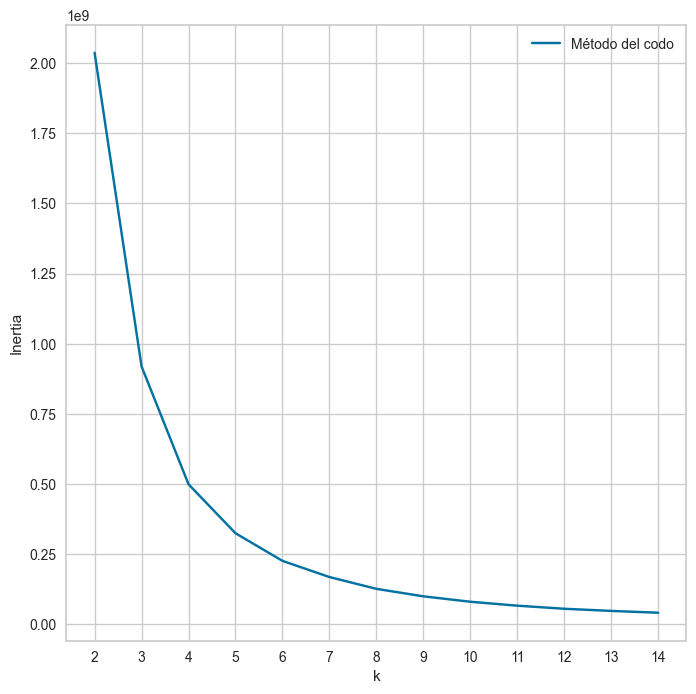

In [43]:
plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_squared_distance, "bx-", label = "Método del codo")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks(K)
plt.legend()
plt.show()

## Método de la silueta

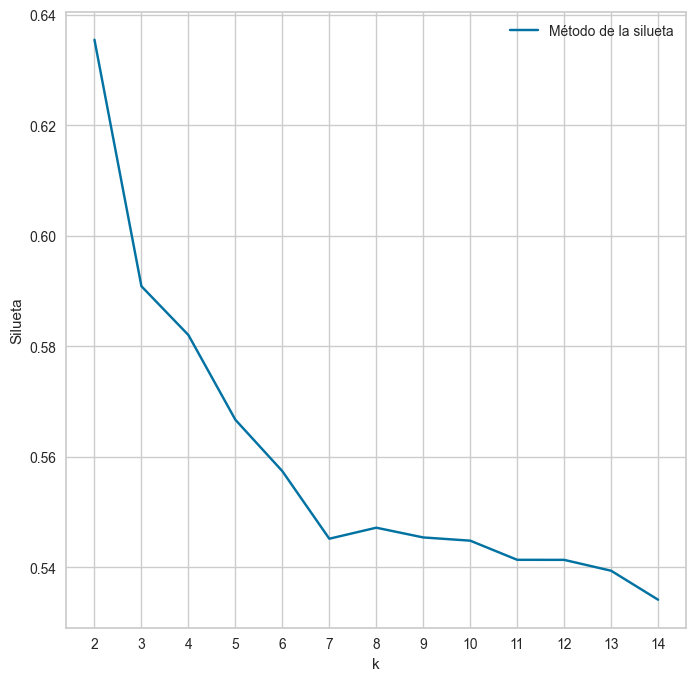

In [44]:
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, "bx-", label = "Método de la silueta")
plt.xlabel("k")
plt.ylabel("Silueta")
plt.xticks(K)
plt.legend()
plt.show()

## Estadístico de GAP

In [45]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        refDisps = np.zeros(nrefs)

        for i in range(nrefs):

            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            km = KMeans(k, n_init = 10)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp

        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        gaps[gap_index] = gap

        resultsdf = pd.concat([resultsdf, pd.DataFrame({'clusterCount': [k], 'gap': [gap]})], ignore_index=True)

    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)

k, gapdf = optimalK(features, nrefs=5, maxClusters=10)

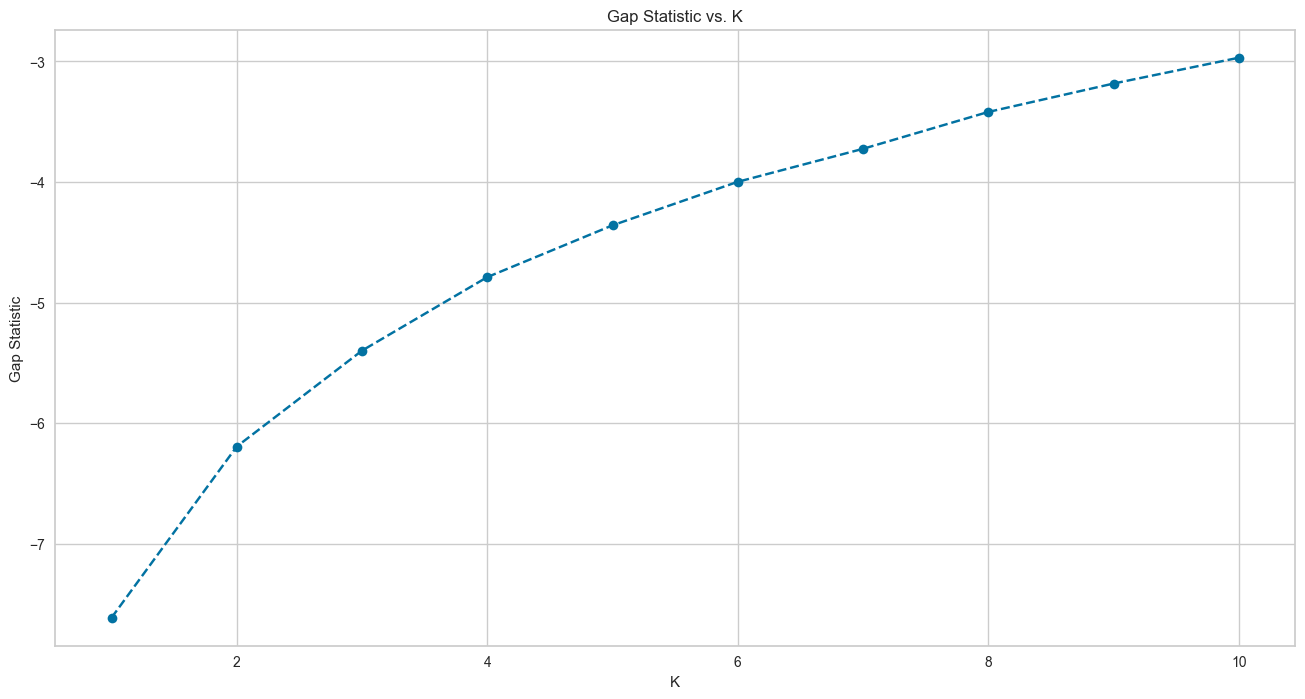

In [46]:
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

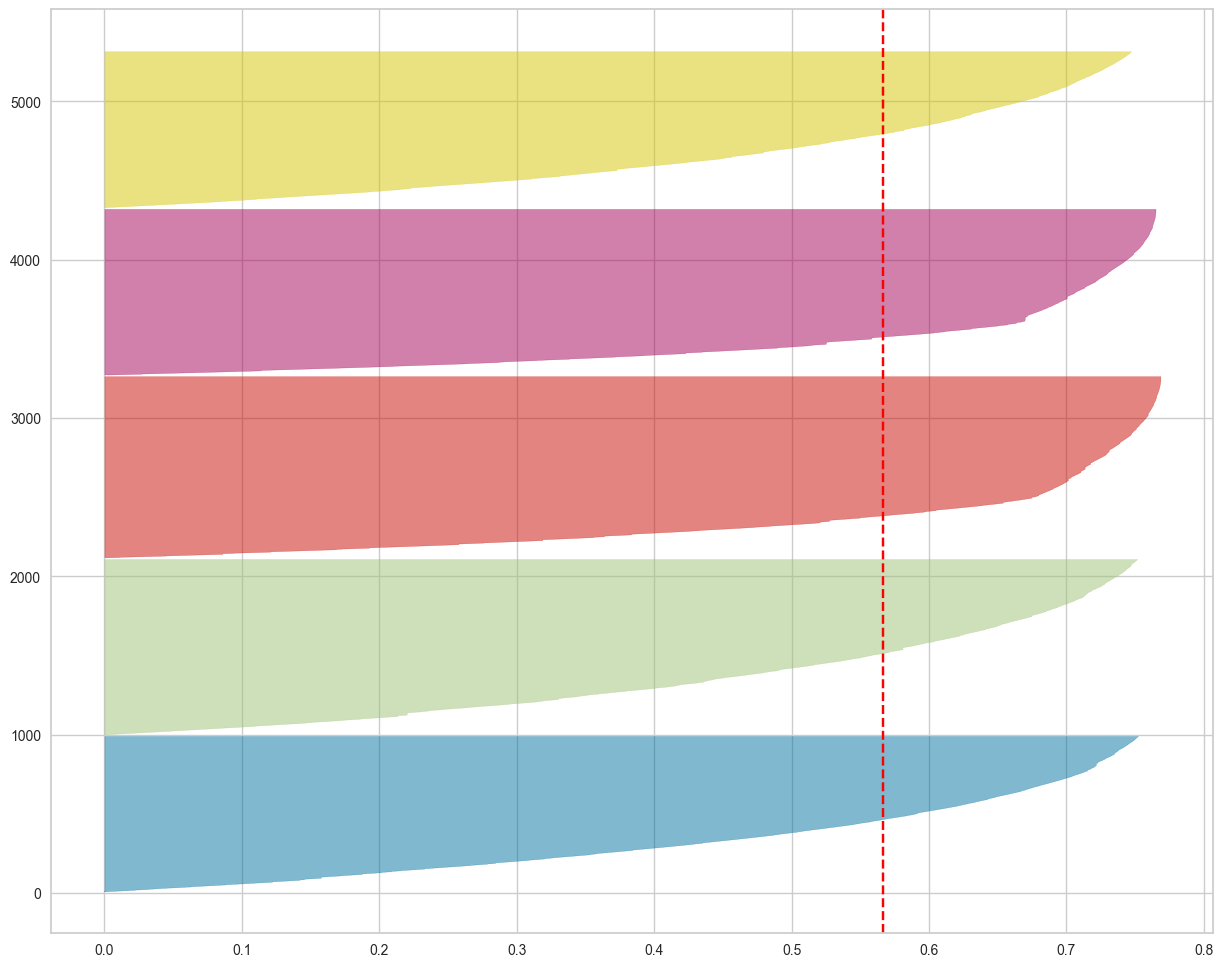

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
plt.figure(figsize=(15, 12))
visualizer.fit(features)

En el gráfico anterior vemos que todos los valores de silueta son mayores a 0, esto significa que los puntos asignados a cada clúster están lo suficientemente lejos de los demás clústeres, lo que indica una buena segmentación en base al puntaje de silueta de cada punto, además esta cantidad de clusters (5) concuerda también con lo observado en el método del codo que se empieza a regular en el cluster número 5.

# Tercer punto
Caracterización de las variables en cada clúster

Como tenemos una variable que contiene texto la cual es información sobre cómo fue el accidente aéreo, vamos a aplicar un análisis de bigramas y/o trigramas para la variable Summary.
Para ello primero definimos una función cuyo papel será tokenizar las palabras.

In [48]:
data['Cluster'] = kmeans.labels_

In [51]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
# Función para tokenizar el texto
def tokenize(text):
    return word_tokenize(text.lower())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


## Clúster 0

In [52]:
data[data["Cluster"] == 0][["Location"]].value_counts().head(10)

Location                   
New York, New York             12
Paris, France                   8
North AtlantiOcean              6
New Delhi, India                6
Newark, New Jersey              6
New York City, New York         5
Papua, New Guinea               4
Off Miami, Florida              4
Off Dakar, Senegal              4
Near Prague, Czechoslovakia     4
Name: count, dtype: int64

In [53]:
data[data["Cluster"] == 0][["Location"]].describe()

,Location
count,982
unique,842
top,"New York, New York"
freq,12


In [54]:
data[data["Cluster"] == 0][["Fatalities"]].value_counts().head(10)

Fatalities
2.0           74
3.0           66
1.0           51
4.0           46
10.0          43
5.0           40
6.0           34
8.0           30
7.0           28
14.0          28
Name: count, dtype: int64

In [55]:
data[data["Cluster"] == 0][["Fatalities"]].describe()

,Fatalities
count,982.000000
mean,23.715886
std,34.991301
min,0.000000
25%,4.000000
50%,12.500000
75%,26.000000
max,301.000000


Ahora miraremos la variable Summary para el Cluster 0

In [56]:
# Aplicar la tokenización solo a las filas del clúster 0
data.loc[data["Cluster"] == 0, 'Tokens'] = data[data["Cluster"] == 0]['Summary'].apply(tokenize)

# Filtrar las filas del clúster 0 y obtener el texto tokenizado
cluster_0_summaries = data[data["Cluster"] == 0]['Summary']

# Vectorizador para bigrams y trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(cluster_0_summaries)

# Obtener los bigramas y trigramas junto con sus frecuencias
ngram_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Ordenar por frecuencia
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Mostrar los bigrams y trigrams más frecuentes
print("N-gramas y frecuencias")
for ngram, freq in sorted_ngrams[:10]:  # Mostrar los 10 más frecuentes
    print(f"{ngram}: {freq}")

N-gramas y frecuencias
en route: 107
crashed sea: 99
aircraft crashed: 87
plane crashed: 77
cargo plane: 58
poor weather: 45
weather conditions: 43
attempting land: 37
shortly taking: 37
000 ft: 33


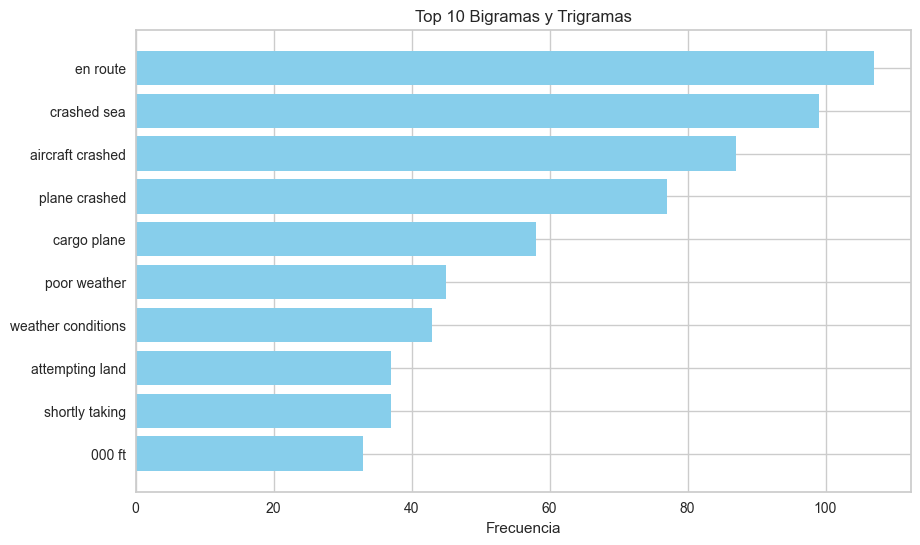

In [57]:
# Convertir a DataFrame para facilidad de manipulación
ngram_df = pd.DataFrame(sorted_ngrams, columns=['Ngram', 'Frequency'])

# Seleccionar los 10 ngrams más frecuentes
top_ngrams = ngram_df.head(10)

# Visualizar los bigrams y trigrams más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams['Ngram'], top_ngrams['Frequency'], color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 10 Bigramas y Trigramas')
plt.gca().invert_yaxis()
plt.show()

### Conclusión Clúster 0

De los datos analizados anteriormente en el Clúster 0 vemos que la localización más frecuente es New york, New York con un conteo de 12.

Con respecto a las fatalidades tenemos que el número de fatalidades más frecuente son 2.0 muertes con una frecuencia de 74, así mismo 3.0 muertes con una frecuencia de 66. Los accidentes en este cluster tienden a ser más mortales en promedio comparado con otros clusters. Aunque la mayoría de los accidentes resultaron en un número de fatalidades más bajo (con la mediana en 12), hay una cantidad significativa de accidentes con un número elevado de muertes (el 75% tiene hasta 26 fatalidades), y algunos accidentes muy mortales (hasta 301 fatalidades).

Con respecto a la variable Summary el Clúster 0 se caracteriza por descripciones de accidentes aéreos que mayoritariamente ocurrieron durante la fase de vuelo en ruta y que, en un número significativo de casos, involucraron aeronaves que se estrellaron en el mar. Las condiciones meteorológicas adversas son un factor recurrente.


## Clúster 1

In [58]:
data[data["Cluster"] == 1][["Location"]].value_counts().head(10)

Location                 
Moscow, Russia               15
Manila, Philippines          13
Guatemala City, Guatemala     7
London, England               7
Kunming, China                7
Grand Canyon, Arizona         6
Karachi, Pakistan             5
Ketchikan, Alaska             5
Kansas City, Kansas           5
Las Vegas, Nevada             5
Name: count, dtype: int64

In [59]:
data[data["Cluster"] == 1][["Location"]].describe()

,Location
count,1108
unique,889
top,"Moscow, Russia"
freq,15


In [60]:
data[data["Cluster"] == 1][["Fatalities"]].value_counts().head(10)

Fatalities
2.0           129
3.0           121
1.0            93
4.0            73
5.0            73
6.0            48
10.0           34
7.0            33
9.0            32
8.0            29
Name: count, dtype: int64

In [61]:
data[data["Cluster"] == 1][["Fatalities"]].describe()

,Fatalities
count,1108.000000
mean,15.939531
std,26.904175
min,0.000000
25%,3.000000
50%,6.000000
75%,17.000000
max,261.000000


Ahora miraremos la variable Summary para el Clúster 1


In [62]:
# Aplicar la tokenización solo a las filas del clúster 1
data.loc[data["Cluster"] == 1, 'Tokens'] = data[data["Cluster"] == 1]['Summary'].apply(tokenize)

# Filtrar las filas del clúster 1 y obtener el texto tokenizado
cluster_1_summaries = data[data["Cluster"] == 1]['Summary']

# Vectorizador para bigrams y trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(cluster_1_summaries)

# Obtener los bigramas y trigramas junto con sus frecuencias
ngram_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Ordenar por frecuencia
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Mostrar los bigrams y trigrams más frecuentes
print("N-gramas y frecuencias")
for ngram, freq in sorted_ngrams[:10]:  # Mostrar los 10 más frecuentes
    print(f"{ngram}: {freq}")

N-gramas y frecuencias
cargo plane: 92
plane crashed: 92
weather conditions: 68
aircraft crashed: 66
en route: 60
attempting land: 59
adverse weather: 47
short runway: 45
engine failure: 40
shortly taking: 39


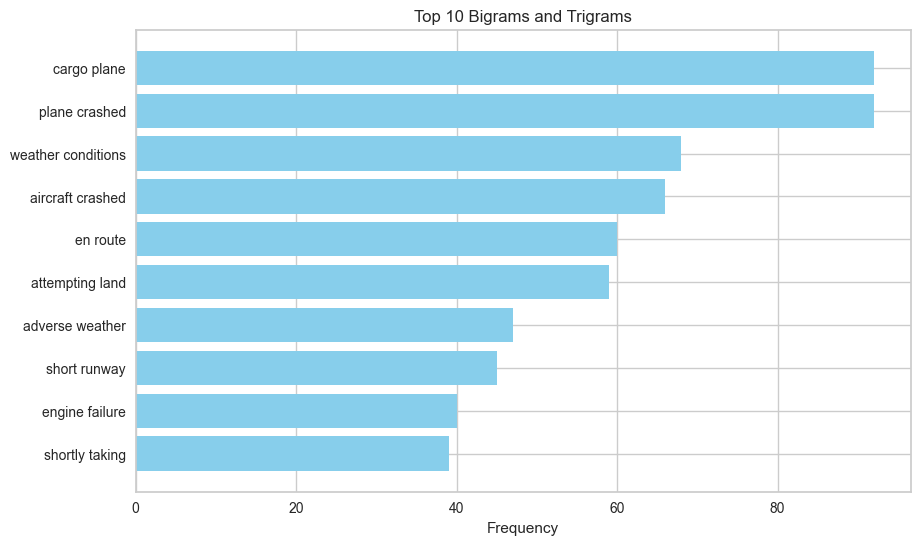

In [63]:
# Convertir a DataFrame para facilidad de manipulación
ngram_df = pd.DataFrame(sorted_ngrams, columns=['Ngram', 'Frequency'])

# Seleccionar los 10 ngrams más frecuentes
top_ngrams = ngram_df.head(10)

# Visualizar los bigrams y trigrams más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams['Ngram'], top_ngrams['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams and Trigrams')
plt.gca().invert_yaxis()
plt.show()

### Conclusión Clúster 1

De los datos analizados anteriormente en el Clúster 1 vemos que la localización más frecuente es Moscow, Russia con un conteo de 15.

Con respecto a las fatalidades tenemos que:
- La fatalidad más común es 2 muertes con 129 incidentes.
- El promedio de fatalidades es de aproximadamente 15.90.
- La desviación estándar es alta (26.9), indicando una gran variabilidad en el número de fatalidades.
- El número máximo de fatalidades en un accidente es 261.

Con respecto a la variable Summary el Clúster 1 se caracteriza por descripciones de accidentes aéreos que involucraron principalmente aviones de carga que se estrellaron, con una fuerte influencia de condiciones meteorológicas adversas y fallos de motor.

## Clúster 2

In [64]:
data[data["Cluster"] == 2][["Location"]].value_counts().head()

Location         
Bogota, Colombia     13
Anchorage, Alaska    13
Cairo, Egypt         12
Chicago, Illinois    11
AtlantiOcean          9
Name: count, dtype: int64

In [65]:
data[data["Cluster"] == 2][["Location"]].describe()

,Location
count,1145
unique,877
top,"Anchorage, Alaska"
freq,13


In [66]:
data[data["Cluster"] == 2][["Fatalities"]].value_counts().head()

Fatalities
2.0           153
3.0           128
1.0           120
4.0            98
5.0            63
Name: count, dtype: int64

In [67]:
data[data["Cluster"] == 2][["Fatalities"]].describe()

,Fatalities
count,1145.000000
mean,14.373799
std,26.347530
min,0.000000
25%,2.000000
50%,5.000000
75%,16.000000
max,329.000000


Ahora miraremos la variable Summary para el Clúster 2

In [68]:
# Aplicar la tokenización solo a las filas del clúster 2
data.loc[data["Cluster"] == 2, 'Tokens'] = data[data["Cluster"] == 2]['Summary'].apply(tokenize)

# Filtrar las filas del clúster 2 y obtener el texto tokenizado
cluster_2_summaries = data[data["Cluster"] == 2]['Summary']

# Vectorizador para bigrams y trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(cluster_2_summaries)

# Obtener los bigramas y trigramas junto con sus frecuencias
ngram_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Ordenar por frecuencia
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Mostrar los bigrams y trigrams más frecuentes
print("N-gramas y frecuencias")
for ngram, freq in sorted_ngrams[:10]:  # Mostrar los 10 más frecuentes
    print(f"{ngram}: {freq}")

N-gramas y frecuencias
plane crashed: 100
cargo plane: 97
aircraft crashed: 93
short runway: 83
en route: 74
attempting land: 68
weather conditions: 60
adverse weather: 40
shortly taking: 40
engine failure: 39


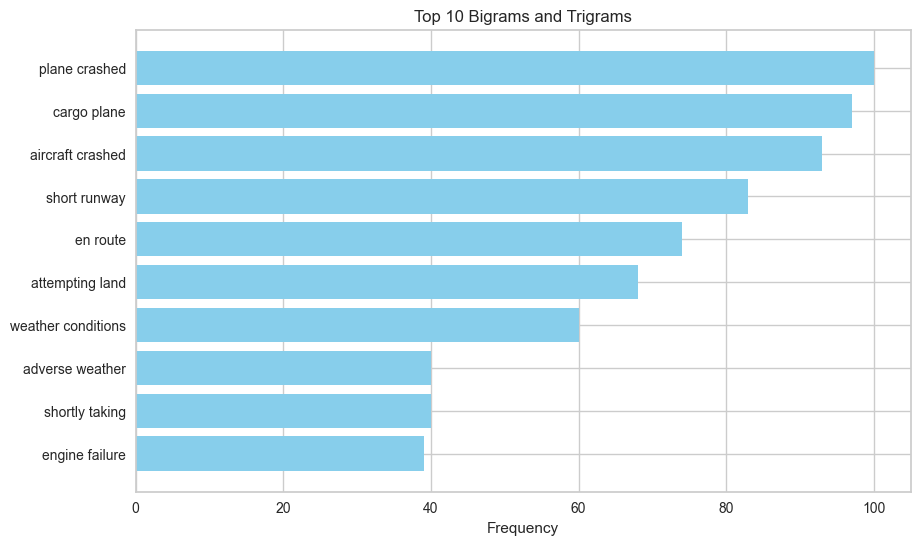

In [69]:
# Convertir a DataFrame para facilidad de manipulación
ngram_df = pd.DataFrame(sorted_ngrams, columns=['Ngram', 'Frequency'])

# Seleccionar los 10 ngrams más frecuentes
top_ngrams = ngram_df.head(10)

# Visualizar los bigrams y trigrams más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams['Ngram'], top_ngrams['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams and Trigrams')
plt.gca().invert_yaxis()
plt.show()

### Conclusión Clúster 2

De los datos analizados anteriormente en el Clúster 2 vemos que las localizaciones más frecuentes son Bogotá, Colombia con un conteo de 13 y Anchorage, Alaska con un conteo de 13.

Tenemos que el número de fatalidades más frecuente son 2.0 muertes con una frecuencia de 153, así mismo 3.0 muertes con una frecuencia de 128. Aunque la mayoría de los accidentes resultaron en relativamente pocas fatalidades (con la mediana en 5), hay una cantidad notable de accidentes con un número significativo de muertes (el 75% tiene hasta 16 fatalidades), y un pequeño número de accidentes muy mortales (hasta 329 fatalidades).

Con respecto a la variable Summary el Clúster 2 se caracteriza por descripciones de accidentes aéreos que involucraron principalmente aviones de carga que se estrellaron. Las condiciones meteorológicas adversas y los fallos de motor son factores recurrentes en estos incidentes. Al igual que en otros clusters, muchos accidentes ocurrieron durante el vuelo en ruta o en maniobras de aterrizaje en pistas cortas.

## Clúster 3

In [70]:
data[data["Cluster"] == 3][["Location"]].value_counts().head()

Location                 
Sao Paulo, Brazil            15
Rio de Janeiro, Brazil       14
Tehran, Iran                  9
Rome, Italy                   8
San Francisco, California     6
Name: count, dtype: int64

In [71]:
data[data["Cluster"] == 3][["Location"]].describe()

,Location
count,1027
unique,834
top,"Sao Paulo, Brazil"
freq,15


In [72]:
data[data["Cluster"] == 3][["Fatalities"]].value_counts().head()

Fatalities
2.0           136
1.0           106
3.0            96
4.0            68
5.0            55
Name: count, dtype: int64

In [73]:
data[data["Cluster"] == 3][["Fatalities"]].describe()

,Fatalities
count,1047.000000
mean,16.580707
std,30.778443
min,0.000000
25%,3.000000
50%,6.000000
75%,18.000000
max,583.000000


Ahora miraremos la variable Summary para el Clúster 3

In [74]:
# Aplicar la tokenización solo a las filas del clúster 3
data.loc[data["Cluster"] == 3, 'Tokens'] = data[data["Cluster"] == 3]['Summary'].apply(tokenize)

# Filtrar las filas del clúster 3 y obtener el texto tokenizado
cluster_3_summaries = data[data["Cluster"] == 3]['Summary']

# Vectorizador para bigrams y trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(cluster_3_summaries)

# Obtener los bigramas y trigramas junto con sus frecuencias
ngram_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Ordenar por frecuencia
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Mostrar los bigrams y trigrams más frecuentes
print("N-gramas y frecuencias")
for ngram, freq in sorted_ngrams[:10]:  # Mostrar los 10 más frecuentes
    print(f"{ngram}: {freq}")

N-gramas y frecuencias
plane crashed: 93
cargo plane: 85
aircraft crashed: 67
weather conditions: 61
attempting land: 59
short runway: 58
en route: 53
poor weather: 45
engine failure: 42
shortly taking: 42


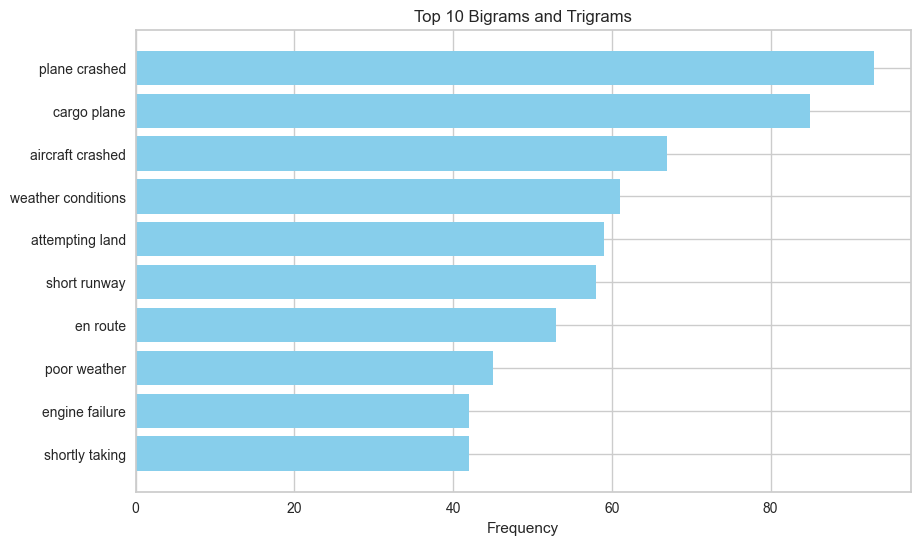

In [75]:
# Convertir a DataFrame para facilidad de manipulación
ngram_df = pd.DataFrame(sorted_ngrams, columns=['Ngram', 'Frequency'])

# Seleccionar los 10 ngrams más frecuentes
top_ngrams = ngram_df.head(10)

# Visualizar los bigrams y trigrams más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams['Ngram'], top_ngrams['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams and Trigrams')
plt.gca().invert_yaxis()
plt.show()

### Conclusión Clúster 3

De los datos analizados anteriormente en el Clúster 3 vemos que la localización más frecuente es Sao Paulo, Brazil con un conteo de 15.

Con respecto a las fatalidades tenemos que la mayoría de los accidentes aéreos resultaron en relativamente pocas fatalidades (con la mediana en 6), hay una notable cantidad de accidentes con un número significativo de muertes (el 75% tiene hasta 18 fatalidades), y un pequeño número de accidentes muy mortales (hasta 583 fatalidades).

Con respecto a la variable Summary el Clúster 3 al igual que los otros clústers se caracteriza por aviones que se estrellaron o por condiciones climáticas, así mismo también hubo aviones de carga que presenciaron lo mismo.

## Clúster 4

In [86]:
data[data["Cluster"] == 4][["Location"]].value_counts().head()

Location               
Near Moscow, Russia        9
Near Medellin, Colombia    7
Near Bogota, Colombia      6
Near La Paz, Bolivia       6
Near Kathmandu, Nepal      5
Name: count, dtype: int64

In [87]:
data[data["Cluster"] == 4][["Location"]].describe()

,Location
count,986
unique,861
top,"Near Moscow, Russia"
freq,9


In [78]:
data[data["Cluster"] == 4][["Fatalities"]].value_counts().head()

Fatalities
3.0           47
4.0           43
1.0           39
6.0           39
2.0           36
Name: count, dtype: int64

In [79]:
data[data["Cluster"] == 4][["Fatalities"]].describe()

,Fatalities
count,986.000000
mean,31.147059
std,42.828802
min,0.000000
25%,7.000000
50%,18.000000
75%,37.000000
max,520.000000


Ahora miraremos la variable Summary para el Clúster 4

In [80]:
# Aplicar la tokenización solo a las filas del clúster 4
data.loc[data["Cluster"] == 4, 'Tokens'] = data[data["Cluster"] == 4]['Summary'].apply(tokenize)

# Filtrar las filas del clúster 4 y obtener el texto tokenizado
cluster_4_summaries = data[data["Cluster"] == 4]['Summary']

# Vectorizador para bigrams y trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(cluster_4_summaries)

# Obtener los bigramas y trigramas junto con sus frecuencias
ngram_freq = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Ordenar por frecuencia
sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

# Mostrar los bigrams y trigrams más frecuentes
print("N-gramas y frecuencias")
for ngram, freq in sorted_ngrams[:10]:  # Mostrar los 10 más frecuentes
    print(f"{ngram}: {freq}")

N-gramas y frecuencias
aircraft crashed: 126
en route: 108
plane crashed: 97
cargo plane: 51
weather conditions: 47
attempting land: 46
000 ft: 44
crashed mountain: 42
shortly taking: 42
short runway: 39


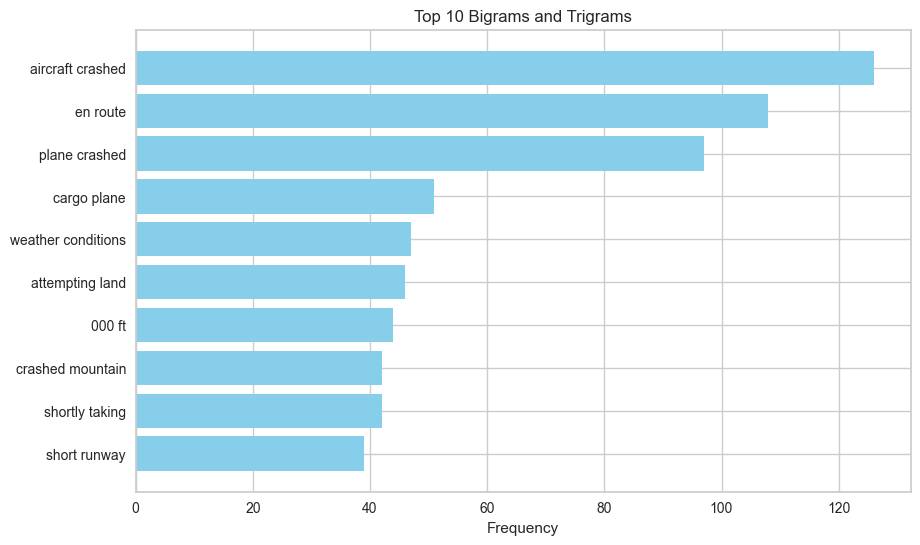

In [85]:
# Convertir a DataFrame para facilidad de manipulación
ngram_df = pd.DataFrame(sorted_ngrams, columns=['Ngram', 'Frequency'])

# Seleccionar los 10 ngrams más frecuentes
top_ngrams = ngram_df.head(10)

# Visualizar los bigrams y trigrams más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(top_ngrams['Ngram'], top_ngrams['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams and Trigrams')
plt.gca().invert_yaxis()
plt.show()

### Conclusión Clúster 4

De los datos analizados anteriormente en el Clúster 4 vemos que la localización más frecuente es Near Moscow, Russia con un conteo de 9.

Con respecto a las fatalidades tenemos que el accidente más grave en este clúster resultó en 520 muertes. Este valor extremadamente alto indica la presencia de eventos catastróficos que, aunque raros, tienen un impacto significativo en la distribución general de las fatalidades.

Con respecto a la variable Summary los términos "aircraft crashed" (126), "plane crashed" (97) y "crashed mountain" (42) son los más frecuentes, indicando que este cluster agrupa principalmente incidentes donde la aeronave se estrelló.

## Análisis del comportamiento de Colombia en cada Clúster

In [111]:
#Filtar los datos en cada clúster donde la locación contenga la palabra "Colombia"
colombia_data = data[data["Location"].str.contains("Colombia", na=False)]
colombia_stats = colombia_data.groupby('Cluster').size().reset_index(name='Accidents_Count')
colombia_stats = colombia_stats.sort_values(by='Accidents_Count', ascending=False)

print("Cantidad de accidentes en Colombia por cluster:")
print(colombia_stats.to_string(index=False))
print()
# Filtrar los datos en cada clúster donde la locación contenga la palabra "Colombia"
for i in range(5):
    cluster_colombia = data[data["Location"].str.contains("Colombia") & (data["Cluster"] == i)]
    print(f"Cluster {i}:")
    # Mostrar estadísticas descriptivas de las fatalidades
    print("Estadísticas descriptivas de Fatalidades:")
    print(cluster_colombia["Fatalities"].describe())
    print()
    
    # Mostrar estadísticas descriptivas de las ubicaciones
    print("Estadísticas descriptivas de Ubicaciones:")
    print(cluster_colombia["Location"].describe())
    print()

    # Mostrar las ubicaciones
    print("Resumen de ubicaciones:")
    print(cluster_colombia["Location"].head())
    print()

    # Mostrar un resumen de los accidentes (primeras 5 filas)
    print("Resumen de las causas de los accidentes aéreos:")
    print(cluster_colombia["Summary"].head())
    print("\n" + "="*50 + "\n")


Cantidad de accidentes en Colombia por cluster:
 Cluster  Accidents_Count
       2               49
       4               43
       3               22
       0               20
       1               20

Cluster 0:
Estadísticas descriptivas de Fatalidades:
count    20.000000
mean     18.050000
std      19.060775
min       1.000000
25%       5.000000
50%      11.500000
75%      22.000000
max      70.000000
Name: Fatalities, dtype: float64

Estadísticas descriptivas de Ubicaciones:
count                          20
unique                         16
top       Near Saravena, Colombia
freq                            3
Name: Location, dtype: object

Resumen de ubicaciones:
59          Near Saravena, Colombia
319    Near Villavicencio, Colombia
368      Nevada del Huila, Colombia
721             Near Tame, Colombia
843      Near Puerto Asis, Colombia
Name: Location, dtype: object

Resumen de las causas de los accidentes aéreos:
59     Crashed into a 8,500 ft. mountain in poor weat...
319    

# Cuarto punto

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [116]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv").drop("index", axis=1)
# Aleatorizar los datos
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
1,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
2,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
3,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
4,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [117]:
# Transformar la columna al formato de fecha de pandas
data["Date"] = pd.to_datetime(data["Date"])

In [118]:
# Codificar la variable categórica de Location usando un LabelEncoder, para poder usarla en el entrenamiento
encoder = LabelEncoder()
location_encoded = encoder.fit_transform(data[['Location']])
location_encoded = location_encoded.reshape(-1, 1)

c:\Users\Usuario\Documents\Universidad\IA\Trabajos\Microproyecto_2\.env\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
# Vectorizar (llevar a números) la variable Summary (que es texto plano)
vectorizer = TfidfVectorizer()
data['Summary'] = data['Summary'].fillna('') # Importante primero rellenar datos nulos
summary_vectorized = vectorizer.fit_transform(data['Summary'])

In [120]:
# Nos aseguramos que la variable Fatalities contenga solo números y además, imputados con 0
data['Fatalities'] = pd.to_numeric(data['Fatalities'], errors='coerce').fillna(0)

# Escalar la variable Fatalities para ayudar al entrenamiento del modelo
scaler = StandardScaler()
fatalities_scaled = scaler.fit_transform(data[['Fatalities']])

In [121]:
# Convertir summary_vectorized a un array
summary_vectorized_dense = summary_vectorized.toarray()

In [122]:
# Combinar todas las variables
features = np.hstack((location_encoded, summary_vectorized.toarray(), fatalities_scaled))

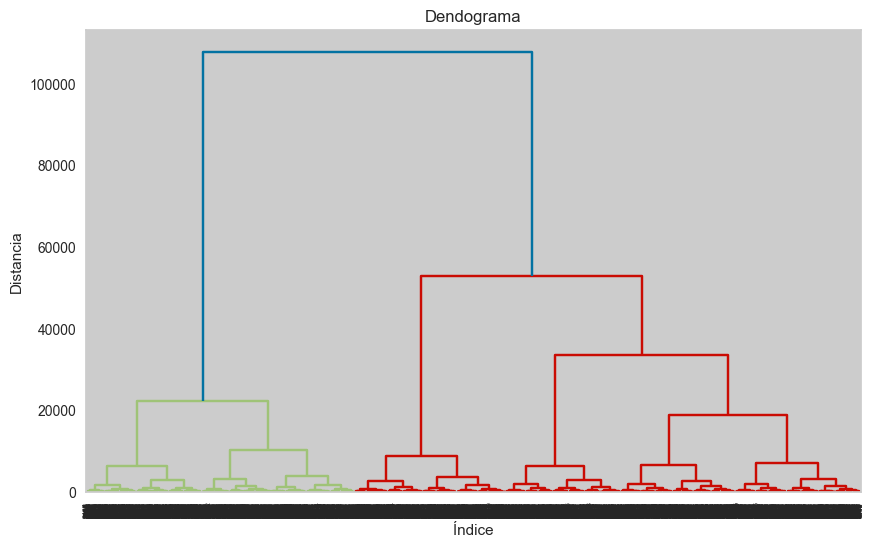

In [123]:
# Realizar el clustering, con el método de Ward para los enlaces
Z = linkage(features, method='ward')

# Mostrar el Dendograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Índice')
plt.ylabel('Distancia')
plt.title('Dendograma')
plt.show()

A partir del Dendograma podemos identificar dos posibles números de clústeres:
* Dos Clústeres: Cortando el dendrograma en el nivel donde se encuentra la línea azul larga, obtenemos dos clústeres principales, que están bastante separados entre sí. Esto indica una gran diferencia entre los dos grupos principales.
* Tres Clústeres: Si bajamos un nivel más en el dendrograma (cortando en el siguiente conjunto de líneas verdes), obtenemos tres clústeres, lo que muestra una estructura de datos más detallada.

In [124]:
# Realizar el clustering aglomerativo con 2 clústeres
clustering2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering2.fit(features)

AgglomerativeClustering()

In [125]:
# Calcular el coeficiente de silueta con 2 clústeres
silhouette_avg2 = silhouette_score(features, clustering2.labels_)
print("Silhouette Score (2):", silhouette_avg2)

Silhouette Score (2): 0.5813192631314562


In [126]:
# Realizar el clustering aglomerativo con 3 clústeres
clustering3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
clustering3.fit(features)

AgglomerativeClustering(n_clusters=3)

In [127]:
# Calcular el coeficiente de silueta con 3 clústeres
silhouette_avg3 = silhouette_score(features, clustering3.labels_)
print("Silhouette Score (3):", silhouette_avg3)

Silhouette Score (3): 0.5292837690298912


Ambos coeficientes de silueta son bastante cercanos (0.58 vs 0.57), lo que indica que tanto el modelo con 2 clústeres como el modelo con 3 clústeres tienen una calidad de agrupamiento similar. Ninguno de los dos valores es significativamente mejor que el otro.

#Quinto punto

## Tendencias Encontradas en los Datos

- **Condiciones Meteorológicas Adversas:** Una tendencia clara es que las condiciones meteorológicas adversas son un factor común en muchos accidentes aéreos. Términos como "weather conditions", "adverse weather", y "poor weather" aparecieron frecuentemente en varios clusters. Esto sugiere que el mal tiempo es un factor significativo que contribuye a los accidentes aéreos.

- **Fase de Vuelo en Ruta:** Muchos accidentes ocurrieron durante la fase de vuelo en ruta, como lo indican los frecuentes n-gramas "en route". Esta tendencia destaca la necesidad de enfocar las medidas de seguridad no solo durante el despegue y el aterrizaje, sino también durante el vuelo en ruta, donde pueden ocurrir problemas críticos.

- **Alta Variabilidad en Fatalidades:** La variabilidad en el número de fatalidades es alta en todos los clusters. Aunque la mediana de fatalidades es generalmente baja, hay accidentes con un número extremadamente alto de muertes. Esto sugiere que, aunque muchos accidentes resultan en pocas muertes, los accidentes más severos pueden tener consecuencias catastróficas.

- **Accidentes en Pistas Cortas:** La frecuencia de los términos "short runway" y "attempting land" indica que las maniobras de aterrizaje en pistas cortas o difíciles son un escenario común para los accidentes. Esto apunta a la necesidad de mejorar las técnicas y procedimientos de aterrizaje en aeropuertos con pistas cortas.

- **Fallos de Motor:** La mención de "engine failure" en varios clusters sugiere que los fallos de motor son una causa recurrente de accidentes aéreos. Esto destaca la importancia de la inspección y el mantenimiento riguroso de los motores de las aeronaves para prevenir tales incidentes.

- **Tendencias del conjunto de datos:**

 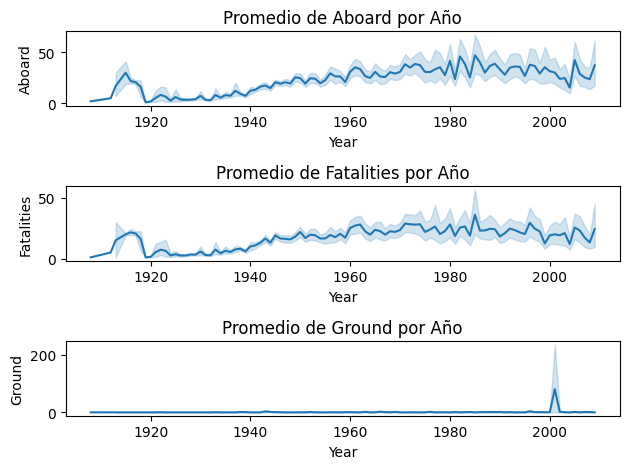

Con la anterior imagen tenemos que el promedio de las fatalidades es creciente con el pasar de los años, así mismo se nota varios picos, con lo cual nos indica una alta variabilidad en los datos.

## Tendencias encontradas en Colombia

Con base al estudio anterior, tenemos que:
- Clúster 2 tiene la mayor cantidad de accidentes en Colombia (49), con un enfoque significativo en Bogotá. Las causas comunes incluyen problemas con la carga y colisiones durante el vuelo en condiciones de niebla.

- Clúster 4 sigue de cerca con 43 accidentes, destacándose por accidentes cerca de Medellín y problemas graves como colisiones con montañas y desapariciones en vuelo.

- Clúster 3 (22 accidentes) y Cluster 0 (20 accidentes) tienen una menor cantidad de accidentes pero presentan problemas similares de condiciones meteorológicas adversas y dificultades durante el vuelo y el aterrizaje.

- Clúster 1 también tiene 20 accidentes y se caracteriza por accidentes en Medellín y problemas de visibilidad y colisiones con montañas.